### PCA on a linear dataset


### Original data

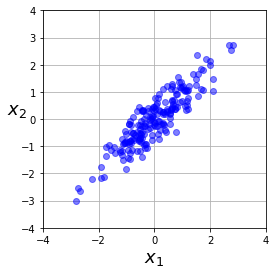

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate


X_scaled = StandardScaler().fit_transform(X) ## feature scaling

plt.figure(figsize=(4,4))
plt.plot(X_scaled[:, 0], X_scaled[:, 1], "bo", alpha=0.5)
plt.axis([-4, 4, -4, 4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.savefig('PCA.png', dpi=300)

### Transformed (=rotated) data

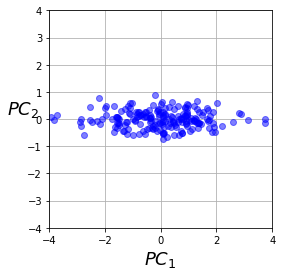

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) ## PCA choosing 2 PCs 

X_pca = pca.fit_transform(X_scaled) ## fit and transform scaled data

plt.figure(figsize=(4,4))
plt.plot(X_pca[:, 0], X_pca[:, 1], "bo", alpha=0.5)
plt.axis([-4, 4, -4, 4])
plt.xlabel("$PC_1$", fontsize=18)
plt.ylabel("$PC_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.savefig('PCA_transformed.png', dpi=300)

### Transformed data with the second component projected on to PC1

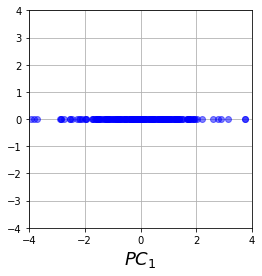

In [3]:
pca = PCA(n_components=1) ## choose only one PC

X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(4,4))
## 0 for 2nd component b/c we only use one
plt.plot(X_pca[:, 0], np.zeros(X_pca.shape), "bo", alpha=0.5)

plt.axis([-4, 4, -4, 4])
plt.xlabel("$PC_1$", fontsize=18)
plt.grid(True)

plt.savefig('PCA_transformed_projected.png', dpi=300)

### Inverse-transformed data using only the first component

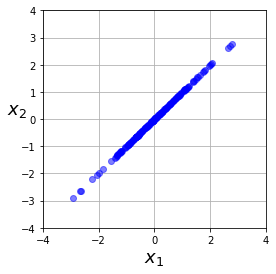

In [4]:
X_inverse = pca.inverse_transform(X_pca) ## inverse transformed data w/ 2 features

plt.figure(figsize=(4,4))
plt.plot(X_inverse[:, 0], X_inverse[:, 1], "bo", alpha=0.5)

plt.axis([-4, 4, -4, 4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.savefig('PCA_inverse_transformed.png', dpi=300)

### PCA on a non-linear dataset

### Original data

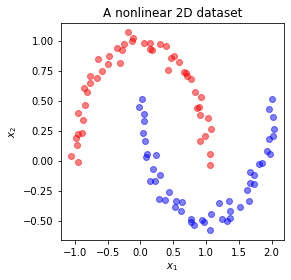

In [5]:
#This example is adopted from https://sebastianraschka.com/Articles/2014_kernel_pca.html

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123, noise=0.05)

plt.figure(figsize=(4,4))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2D dataset')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.savefig('PCA_nonlinear.png', dpi=300)

### Transformed data

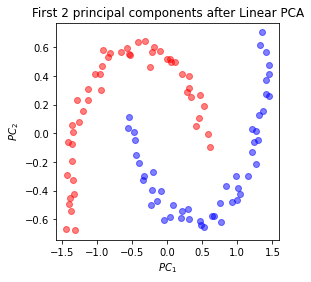

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure(figsize=(4,4))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('$PC_1$')
plt.ylabel('$PC_2$')

plt.savefig('PCA_nonlinear_transformed.png', dpi=300)

### Transformed data with the second component projected on to PC1

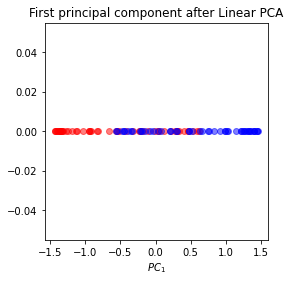

In [7]:
import numpy as np

pca = PCA(n_components=1) ## transformed and projected to 1st PC
X_pca = pca.fit_transform(X)

plt.figure(figsize=(4,4))
plt.scatter(X_pca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_pca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('$PC_1$')

plt.savefig('PCA_nonlinear_transformed_projected.png', dpi=300)

### Inverse-transformed data using only the first component

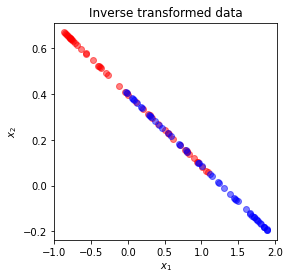

In [8]:
X_inverse = pca.inverse_transform(X_pca) ## inverse transform

plt.figure(figsize=(4,4))
plt.scatter(X_inverse[y==0, 0], X_inverse[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_inverse[y==1, 0], X_inverse[y==1, 1], color='blue', alpha=0.5)

plt.title('Inverse transformed data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.savefig('PCA_nonlinear_inverse_transformed.png', dpi=300)

Not very good

### Kernel PCA on a non-linear dataset

### Original data

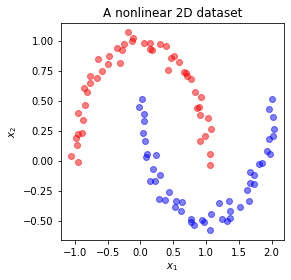

In [9]:
#This example is adopted from https://sebastianraschka.com/Articles/2014_kernel_pca.html

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123, noise=0.05)

plt.figure(figsize=(4,4))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2D dataset')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.savefig('kPCA_nonlinear.png', dpi=300)

### Transformed and projected (in a higher dimension) data

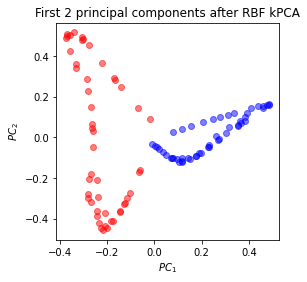

In [10]:
from sklearn.decomposition import KernelPCA

## using kernel PCA
kpca = KernelPCA(kernel='rbf', gamma=15, fit_inverse_transform=True)## need to specify that  inverse transform is true, doesn't do auto
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(4,4))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF kPCA')
plt.xlabel('$PC_1$')
plt.ylabel('$PC_2$')

plt.savefig('kPCA_nonlinear_transformed.png', dpi=300)

### Inverse-transformed data

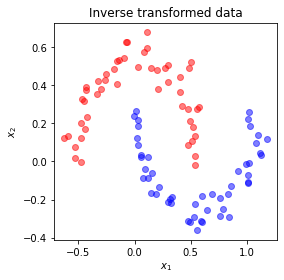

In [11]:
X_inverse = kpca.inverse_transform(X_kpca)

plt.figure(figsize=(4,4))
plt.scatter(X_inverse[y==0, 0], X_inverse[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_inverse[y==1, 0], X_inverse[y==1, 1], color='blue', alpha=0.5)

plt.title('Inverse transformed data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.savefig('kPCA_nonlinear_inverse_transformed.png', dpi=300)

### Varying the hyperparameter gamma 

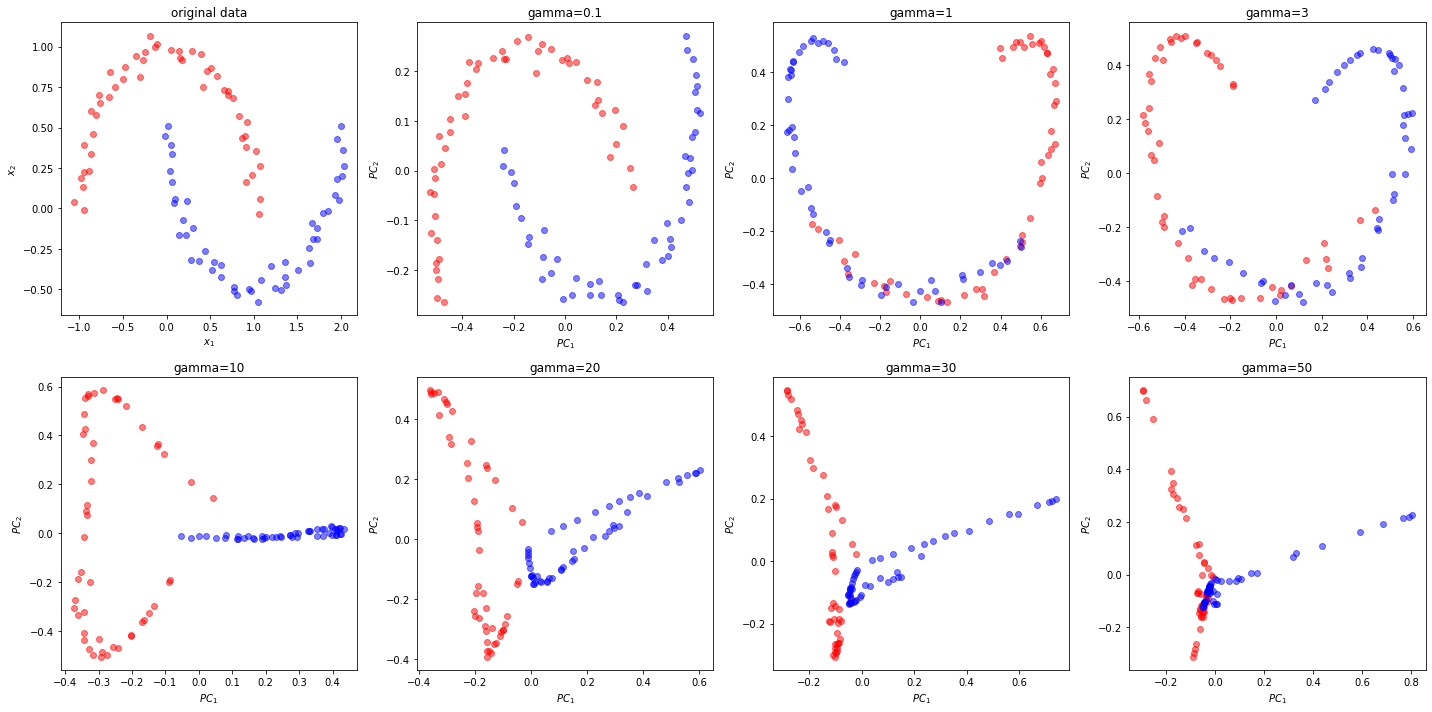

In [12]:
from sklearn.datasets import make_moons
from sklearn.metrics import mean_squared_error

X, y = make_moons(n_samples=100, random_state=123, noise=0.05)


plt.figure(figsize=(20,10))


plt.subplot(2, 4, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('original data')

## diff gama values as an array
gamma = [0.1, 1, 3, 10, 20, 30, 50]

for i in np.arange(7)+2:    
    plt.subplot(2, 4, i)
    kpca = KernelPCA(kernel='rbf', gamma=gamma[i-2], fit_inverse_transform=True)
    X_kpca = kpca.fit_transform(X)
    plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
    plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)
    plt.xlabel('$PC_1$')
    plt.ylabel('$PC_2$')
    plt.title('gamma='+str(gamma[i-2]))

plt.tight_layout()
plt.savefig('kPCA_hyperparameter_optimization.png', dpi=300)

### PCA for Astronomical data

You may need to install scikit-image, but go ahead and try without installing it first. If you don't find skimage then install it.

In [15]:
%pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.2 MB 8.0 MB/s eta 0:00:01�           | 19.6 MB 8.0 MB/s eta 0:00:02
     |████████████████████████████████| 4.4 MB 114.5 MB/s eta 0:00:01
  Using cached tifffile-2021.10.12-py3-none-any.whl (175 kB)
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


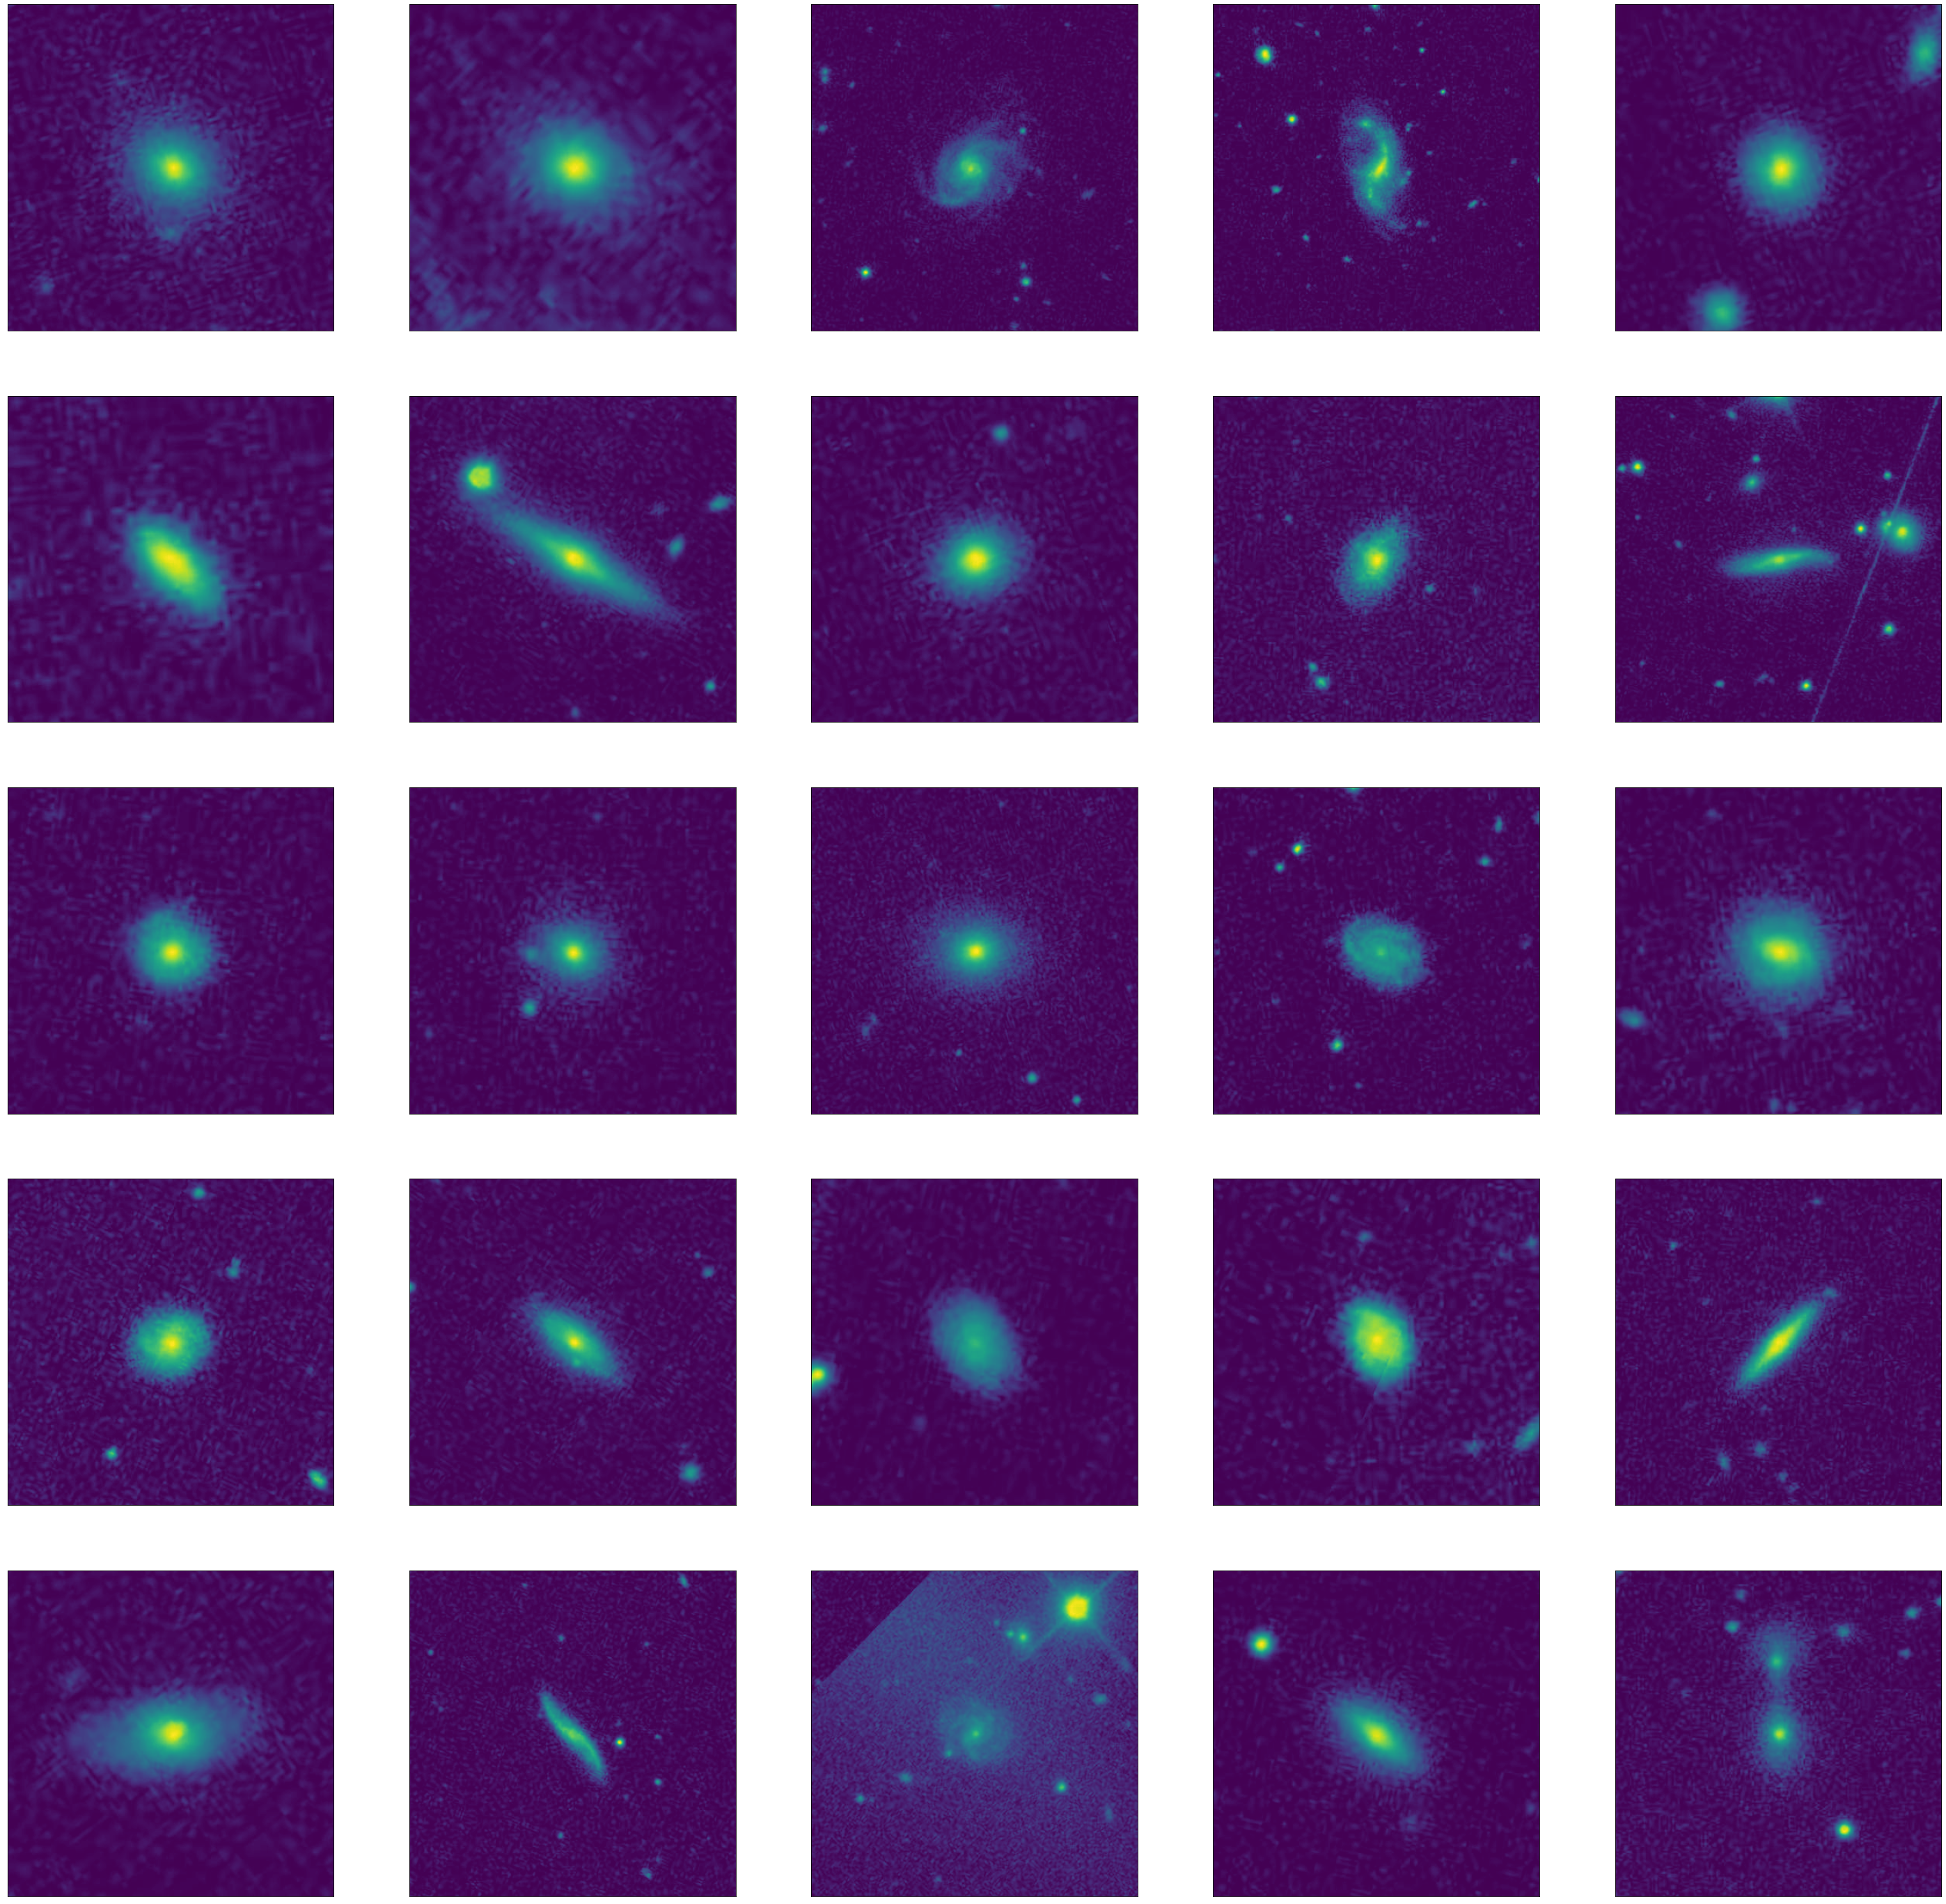

In [16]:
import glob
import skimage
from skimage.transform import resize, rescale
from skimage import io

path = '/blue/ast4930/share/galaxy-zoo/*'

images = []

fig, axes = plt.subplots(ncols= 5, nrows = 5, figsize=(50,50))

ax = axes.ravel()

for i, file in enumerate(glob.glob(path+"*")):
    img = skimage.io.imread(file)
    img = img.mean(axis=2)
    if i < 25:
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    img_resized = resize(img,(100,100))
    length = np.prod(img_resized.shape)
    img_resized = np.reshape(img_resized,length)
    images.append(img_resized)
    
images = np.vstack(images)

In [16]:
images.shape

(133, 10000)

In [51]:
pca = PCA(n_components=0.9) ## want to keep 90% of information

images_pca = pca.fit_transform(images) ## fit and transform images

In [52]:
images_pca.shape

(133, 52)

Need only 52 PCs to keep 90% of the information

ValueError: cannot reshape array of size 2 into shape (100,100)

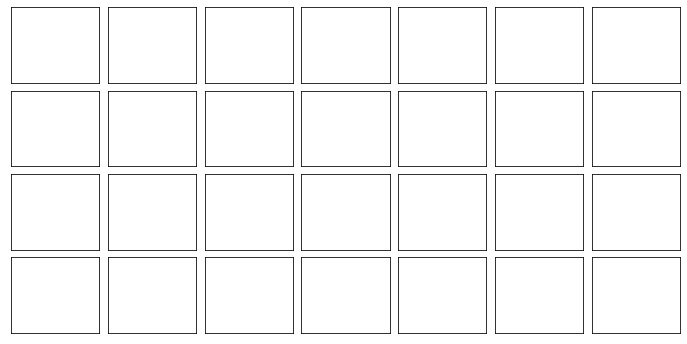

In [39]:
## Showing PCs, what areas are most important to look at
fig, axes = plt.subplots(4, 7, figsize=(12, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    # Note that pca.components_ contains eigenvectors.
    ax.imshow((pca.components_[i].reshape(100, 100)))

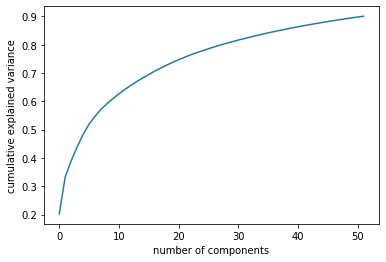

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

52 features reaches 90% or orig info

### TODO: Inverse transform the PCA-ed images and compare them with the original images.

In [ ]:
images_inversed = pca.inverse()

### TODO: Fill in the empty part to make some plots.

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(15, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(images[i].reshape(100,100))
    ax[1, i].imshow(images_inversed[i].reshape(100,100))

### TODO: What is the mean squared error between the original images and the inverse transformed images?

In [ ]:
from sklearn.metrics import mean_squared_error

## orig vs transformed
mean_squared_error(images, images_inversed)

### TODO: Repeat the above experiment and compute mean squared error when you adopt 80%, 90%, and 95%. How does the error vary? Does that make sense?

In [ ]:
# Varry amount of ifo kept in data

#80%
pca = PCA(n_components=0.8)
images_pca = pca.fit_transform(images)
images_inversed = pca.inverse_transform(images_pca)
print("Number of PCs: {:}".format(pca.n_components_))
print('MSE: {:.2f}'.format(mean_squared_error(images, images_inversed)))

#90%
pca = PCA(n_components=0.9)
images_pca = pca.fit_transform(images)
images_inversed = pca.inverse_transform(images_pca)
print("Number of PCs: {:}".format(pca.n_components_))
print('MSE: {:.2f}'.format(mean_squared_error(images, images_inversed)))

#95%
pca = PCA(n_components=0.95)
images_pca = pca.fit_transform(images)
images_inversed = pca.inverse_transform(images_pca)
print("Number of PCs: {:}".format(pca.n_components_))
print('MSE: {:.2f}'.format(mean_squared_error(images, images_inversed)))